In [1]:
from google.colab import drive

In [2]:
#@title **Se carga el directorio google drive**
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/YOLO_V3_Tiny_SE
%pwd
%ls

/content/drive/MyDrive/YOLO_V3_Tiny_SE
logger.py         pruebacar.jpg    YOLOV3_MODIFICACION_SE_CBAM.txt
plot_yolo_log.py  PyTorch-YOLOv3/
pruebacar2.jpg    vehicles.zip


In [5]:
!git clone https://github.com/promach/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 796, done.
remote: Total 796 (delta 0), reused 0 (delta 0), pack-reused 796
Receiving objects: 100% (796/796), 16.25 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (458/458), done.


In [6]:
%cd PyTorch-YOLOv3/
%ls

/content/drive/MyDrive/YOLO_V3_Tiny_SE/PyTorch-YOLOv3
assets/  detect.py  output/       requirements.txt  utils/
config/  LICENSE    __pycache__/  test.py           weights/
data/    models.py  README.md     train.py


In [ ]:
#Instalar los requerimientos:
!pip3 install -r requirements.txt

In [13]:
#Bajando los pesos para comprobar que nuestro yolo si detecta. 
#También sirve para darle pesos iniciales a nuestro entrenamiento.
%cd weights/
!bash download_weights.sh
%ls
%cd ..

[Errno 2] No such file or directory: 'weights/'
/content/drive/MyDrive/YOLO_V3_Tiny_SE/PyTorch-YOLOv3/weights
--2021-11-20 15:03:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  50.8MB/s    in 4.9s    

2021-11-20 15:03:43 (48.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2021-11-20 15:03:43--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  35.

In [7]:
!python3 detect.py --image_folder data/samples


Namespace(batch_size=1, checkpoint_model=None, class_path='data/coco.names', conf_thres=0.8, image_folder='data/samples', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.659172
	+ Batch 1, Inference Time: 0:00:00.302607
	+ Batch 2, Inference Time: 0:00:00.313999
	+ Batch 3, Inference Time: 0:00:00.332273
	+ Batch 4, Inference Time: 0:00:00.310507
	+ Batch 5, Inference Time: 0:00:00.338648
	+ Batch 6, Inference Time: 0:00:00.291079
	+ Batch 7, Inference Time: 0:00:00.314811
	+ Batch 8, Inference Time: 0:00:00.352143

Saving images:
(0) Image: 'data/samples/dog.jpg'
	+ Label: dog, Conf: 0.99335
	+ Label: bicycle, Conf: 0.99981
	+ Label: truck, Conf: 0.94229
(1) Image: 'data/samples/eagle.jpg'
	+ Label: bird, Conf: 0.99703
(2) Image: 'data/samples/field.jpg'
	+ Label: person, Conf: 0.99996
	+ Label: horse, Conf: 0.99977
	+ Label: dog, Conf: 0.99409
(3) Image: 'data

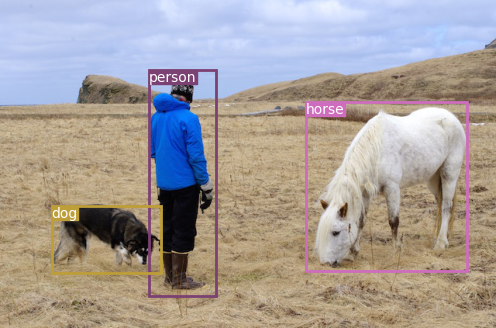

In [8]:
from IPython.display import Image
Image('output/field.png')

In [9]:
%cd data/custom/
%ls

/content/drive/My Drive/YOLO_V3_Tiny_SE/PyTorch-YOLOv3/data/custom
classes.names      images_ori/  train.txt      valid.txt_ori
classes.names_ori  labels/      train.txt_ori  vehicles.zip
images/            labels_ori/  valid.txt


In [ ]:
!unzip vehicles.zip

In [10]:
%cd ../..
%pwd

/content/drive/My Drive/YOLO_V3_Tiny_SE/PyTorch-YOLOv3


'/content/drive/My Drive/YOLO_V3_Tiny_SE/PyTorch-YOLOv3'

In [39]:
#!python3 train.py --model_def config/yolov3-tiny_custom.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 100
!python3 train.py --model_def config/yolov3-tiny_custom.cfg --data config/custom.data --pretrained_weights checkpoints/yolov3_ckpt_19.pth --epochs 100

Se han truncado las últimas 5000 líneas del flujo de salida.
| conf_noobj | 0.000050     | 0.000182     |
+------------+--------------+--------------+
Total loss 0.3567284643650055
---- ETA 0:00:07.058382
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.ui

In [52]:
!python3 detect.py --model_def config/yolov3-tiny_custom.cfg --weights_path checkpoints/yolov3_ckpt_99.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.5

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.5, image_folder='data/samples/sample_custom/', img_size=416, model_def='config/yolov3-tiny_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/yolov3_ckpt_99.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.033385
	+ Batch 1, Inference Time: 0:00:00.022185

Saving images:
(0) Image: 'data/samples/sample_custom/pruebacar.jpg'
	+ Label: Car, Conf: 0.98941
	+ Label: Car, Conf: 0.98330
	+ Label: Car, Conf: 0.99888
	+ Label: Ambulance, Conf: 0.37721
(1) Image: 'data/samples/sample_custom/pruebacar2.jpg'
	+ Label: Ambulance, Conf: 0.78761


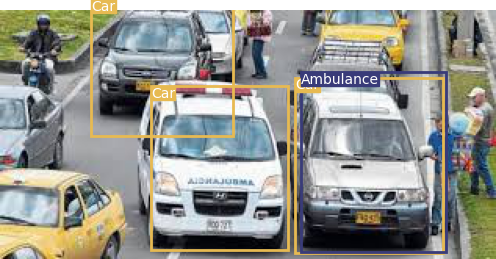

In [53]:
Image('output/pruebacar.png')

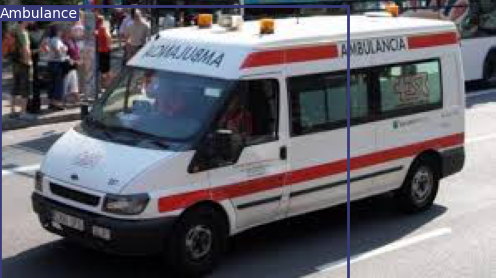

In [54]:
Image('output/pruebacar2.png')

In [46]:
!python3 plot_yolo_log.py logs/2021_11_20__16_43_29/events.out.tfevents.1637426612.1f90b2e6ce35.3028.0

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['loss_1', 'x_1', 'y_1', 'w_1', 'h_1', 'conf_1', 'cls_1', 'cls_acc_1', 'recall50_1', 'recall75_1', 'precision_1', 'conf_obj_1', 'conf_noobj_1', 'loss_2', 'x_2', 'y_2', 'w_2', 'h_2', 'conf_2', 'cls_2', 'cls_acc_2', 'recall50_2', 'recall75_2', 'precision_2', 'conf_obj_2', 'conf_noobj_2', 'loss', 'val_precision', 'val_recall', 'val_mAP', 'val_f1'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
100
[ScalarEvent(wall_time=1637426643.210581, step=0, value=0.2666592597961426), ScalarEvent(wall_time=1637426673.0634313, step=1, value=0.28221434354782104), ScalarEvent(wall_time=1637426702.355353, step=2, value=0.20715297758579254), ScalarEvent(wall_time=1637426730.1508203, step=3, value=0.3989226818084717), ScalarEvent(wall_time=1637426763.846487, step=4, value=0.34925559163093567), ScalarEvent(wall_time=1637426793.1650102, step=5, value=0.26221954822540283), ScalarEvent(wall_time=1637426822.0

In [47]:
##Crear YOLO + modulo de atención.
!python3 train.py --model_def config/yolov3-tiny_custom_se.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 20

Se han truncado las últimas 5000 líneas del flujo de salida.
| conf_noobj | 0.003308     | 0.004910     |
+------------+--------------+--------------+
Total loss 4.088407039642334
---- ETA 0:00:18.690895
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uin

In [ ]:
!python3 detect.py --model_def config/yolov3-tiny_custom_se.cfg --weights_path checkpoints/yolov3_ckpt_19.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.8